#### Author : 문범수
#### date : 2023-11-07
#### title : 1126 과제

## 필수과제 2

1) crime.csv 데이터 시계열 분석 진행
2) 해당 범죄와 교통사고건에 대해서 시계열적으로 나눠서,
         그래프를 그리면서, 본인 생각하는 인사이트 정리해서 뽑아라
3) 배웠던 시각화 문법을 가지고 함께 수치와 시각화 통해서 정리

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [15]:
## Unnamed:0 column 삭제

crime = pd.read_csv("crime.csv", index_col=0)

In [16]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [17]:
## REPORTED_DATE 변수 : 범주형 -> datetime 으로 변환

crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])

In [18]:
crime.isnull().sum()

OFFENSE_TYPE_ID           0
OFFENSE_CATEGORY_ID       0
REPORTED_DATE             0
GEO_LON                3615
GEO_LAT                3615
NEIGHBORHOOD_ID           0
IS_CRIME                  0
IS_TRAFFIC                0
dtype: int64

In [19]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [20]:
crime = crime.set_index('REPORTED_DATE')
crime = crime.sort_index()

In [21]:
crime['year'] = crime.index.year
crime['month'] = crime.index.month

In [22]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year,month
REPORTED_DATE,,,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0,2012,1
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0,2012,1
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1,2012,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1,2012,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0,2012,1
...,...,...,...,...,...,...,...,...,...
2017-09-29 03:58:00,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0,2017,9
2017-09-29 03:58:00,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0,2017,9
2017-09-29 04:12:00,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0,2017,9


1) OFFENSE_TYPE_ID
2) OFFENSE_CATEGORY_ID

In [23]:
crime['OFFENSE_TYPE_ID'].unique()

array(['aggravated-assault', 'violation-of-restraining-order',
       'traffic-accident-dui-duid', 'traffic-accident', 'assault-simple',
       'criminal-mischief-other', 'robbery-street',
       'theft-items-from-vehicle', 'robbery-business',
       'traffic-accident-hit-and-run', 'theft-parts-from-vehicle',
       'burglary-residence-no-force', 'menacing-felony-w-weap',
       'criminal-mischief-mtr-veh', 'burglary-vending-machine',
       'harassment', 'burglary-residence-by-force',
       'theft-of-motor-vehicle', 'robbery-residence', 'theft-shoplift',
       'criminal-trespassing', 'criminal-mischief-graffiti',
       'burglary-business-by-force', 'aggravated-assault-dv',
       'theft-other', 'assault-dv', 'theft-bicycle',
       'robbery-purse-snatch-w-force', 'robbery-bank',
       'indecent-exposure', 'theft-of-services', 'drug-cocaine-possess',
       'drug-marijuana-sell', 'burglary-business-no-force',
       'drug-forgery-to-obtain', 'robbery-car-jacking',
       'vehicular

In [24]:
crime['OFFENSE_TYPE_ID'].value_counts()

traffic-accident                87420
traffic-accident-hit-and-run    33514
theft-items-from-vehicle        27468
traf-other                      25793
theft-of-motor-vehicle          23004
                                ...  
riot                                1
homicide-police-by-gun              1
theft-from-yards                    1
theft-of-cable-services             1
explosives-posses                   1
Name: OFFENSE_TYPE_ID, Length: 196, dtype: int64

In [29]:
t = crime['OFFENSE_TYPE_ID'].value_counts() 

t.to_frame()

,OFFENSE_TYPE_ID
traffic-accident,87420
traffic-accident-hit-and-run,33514
theft-items-from-vehicle,27468
traf-other,25793
theft-of-motor-vehicle,23004
...,...
riot,1
homicide-police-by-gun,1
theft-from-yards,1
theft-of-cable-services,1


In [30]:
t = t[t != 1]

In [31]:
t

traffic-accident                87420
traffic-accident-hit-and-run    33514
theft-items-from-vehicle        27468
traf-other                      25793
theft-of-motor-vehicle          23004
                                ...  
drug-barbiturate-mfr                2
gambling-device                     2
homicide-solicitation               2
altering-vin-number                 2
eavesdropping                       2
Name: OFFENSE_TYPE_ID, Length: 190, dtype: int64

In [32]:
crime['OFFENSE_TYPE_ID'].value_counts().head(15)

traffic-accident                87420
traffic-accident-hit-and-run    33514
theft-items-from-vehicle        27468
traf-other                      25793
theft-of-motor-vehicle          23004
theft-other                     19216
criminal-mischief-mtr-veh       15877
theft-shoplift                  12896
criminal-mischief-other         12772
assault-simple                  11801
criminal-trespassing            11568
burglary-residence-no-force      9559
burglary-residence-by-force      9268
theft-parts-from-vehicle         8477
theft-bicycle                    8251
Name: OFFENSE_TYPE_ID, dtype: int64

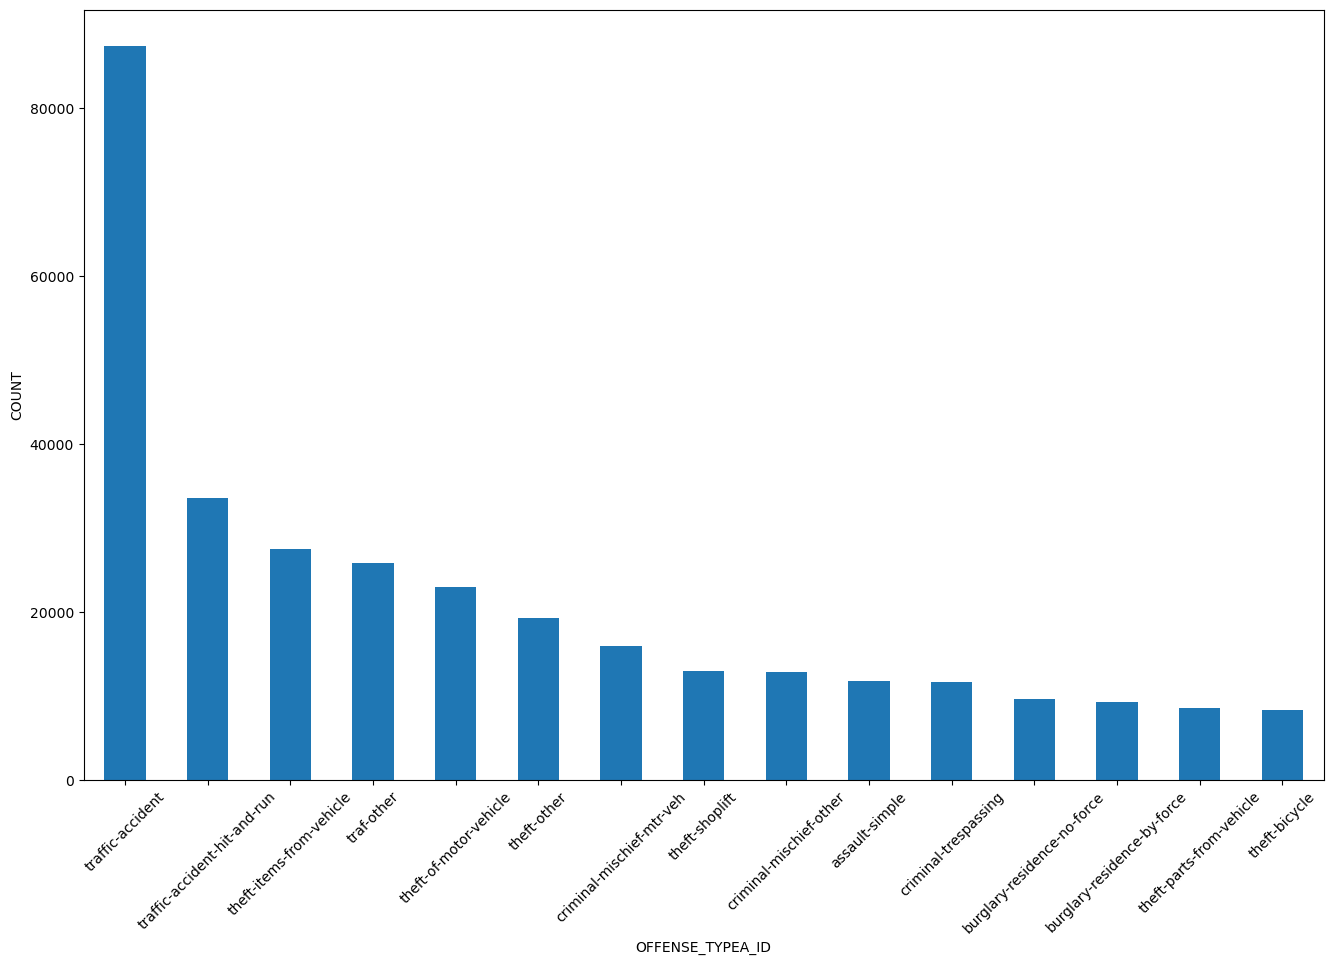

In [33]:
type_value = crime['OFFENSE_TYPE_ID'].value_counts().head(15)

plt.figure(figsize = (16,10))
type_value.plot(kind = 'bar')
plt.xlabel('OFFENSE_TYPEA_ID')
plt.ylabel('COUNT')
plt.xticks(rotation = 45)

plt.show()

In [35]:
crime['OFFENSE_CATEGORY_ID'].unique()

array(['aggravated-assault', 'all-other-crimes', 'traffic-accident',
       'other-crimes-against-persons', 'public-disorder', 'robbery',
       'theft-from-motor-vehicle', 'burglary', 'larceny', 'auto-theft',
       'drug-alcohol', 'white-collar-crime', 'sexual-assault', 'arson',
       'murder'], dtype=object)

In [36]:
crime.groupby('OFFENSE_TYPE_ID')['OFFENSE_CATEGORY_ID'].unique()

OFFENSE_TYPE_ID
accessory-conspiracy-to-crime                [all-other-crimes]
agg-aslt-police-weapon                       [all-other-crimes]
aggravated-assault                         [aggravated-assault]
aggravated-assault-dv                      [aggravated-assault]
altering-vin-number                        [white-collar-crime]
                                              ...              
weapon-other-viol                            [all-other-crimes]
weapon-poss-illegal-dangerous                [all-other-crimes]
weapon-unlawful-discharge-of                 [all-other-crimes]
window-peeping                   [other-crimes-against-persons]
wiretapping                                  [all-other-crimes]
Name: OFFENSE_CATEGORY_ID, Length: 196, dtype: object

In [37]:
crime['OFFENSE_CATEGORY_ID'].value_counts()

traffic-accident                125060
all-other-crimes                 72343
public-disorder                  50807
larceny                          48351
theft-from-motor-vehicle         35945
drug-alcohol                     28984
burglary                         26606
auto-theft                       23453
other-crimes-against-persons     21137
aggravated-assault               10961
robbery                           6559
white-collar-crime                6219
sexual-assault                    3615
arson                              602
murder                             269
Name: OFFENSE_CATEGORY_ID, dtype: int64

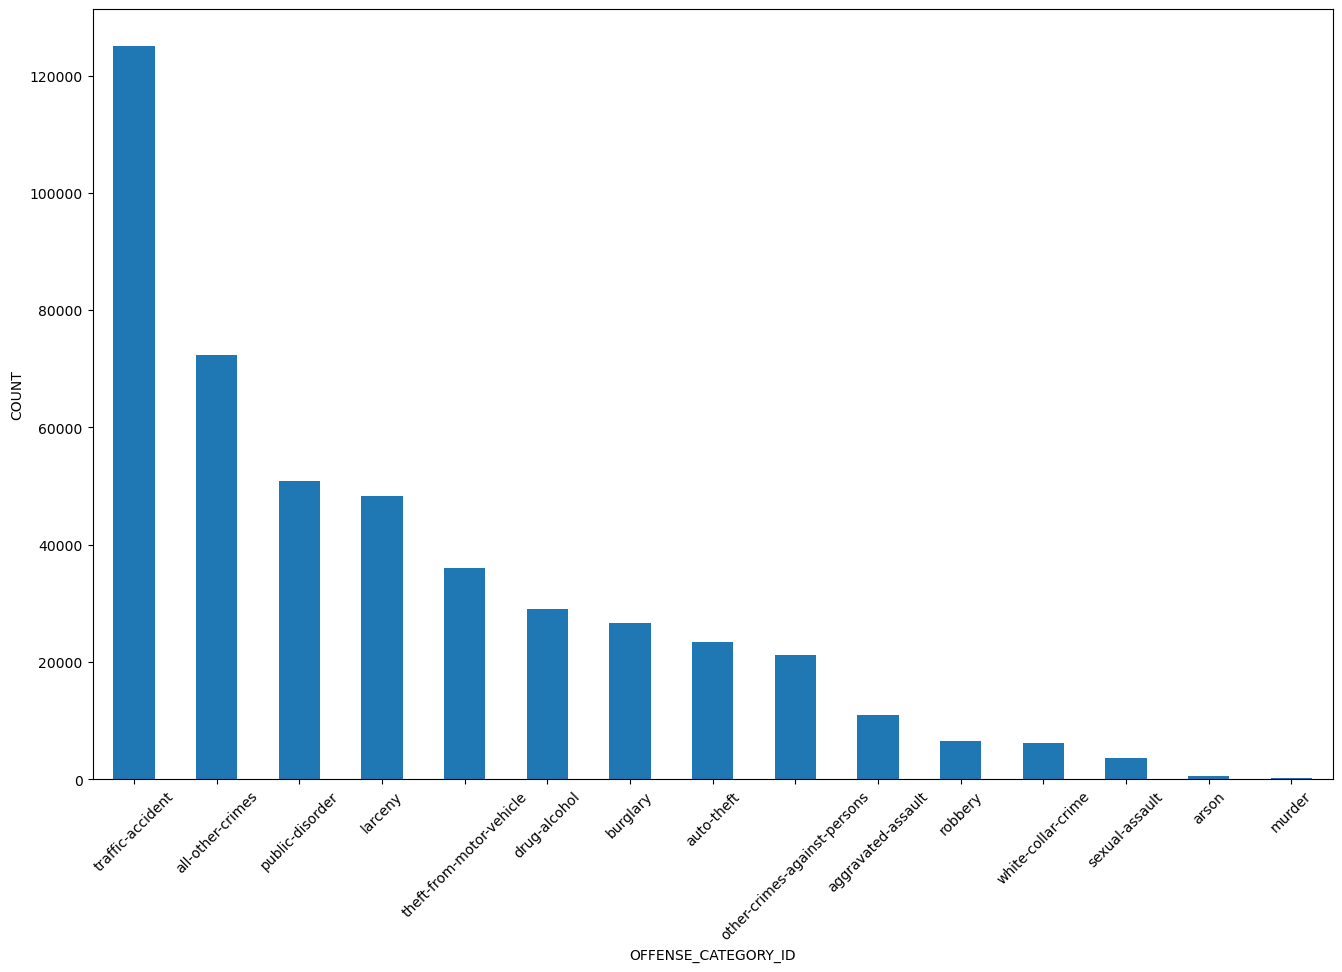

In [38]:
## 시각화

cate_value = crime['OFFENSE_CATEGORY_ID'].value_counts()

plt.figure(figsize = (16,10))
cate_value.plot(kind = 'bar')
plt.xlabel('OFFENSE_CATEGORY_ID')
plt.ylabel('COUNT')
plt.xticks(rotation = 45)

plt.show()

In [39]:
year_crime = crime.groupby('year')['IS_CRIME'].sum()

year_crime

year
2012    37286
2013    50698
2014    62690
2015    65894
2016    67381
2017    51902
Name: IS_CRIME, dtype: int64

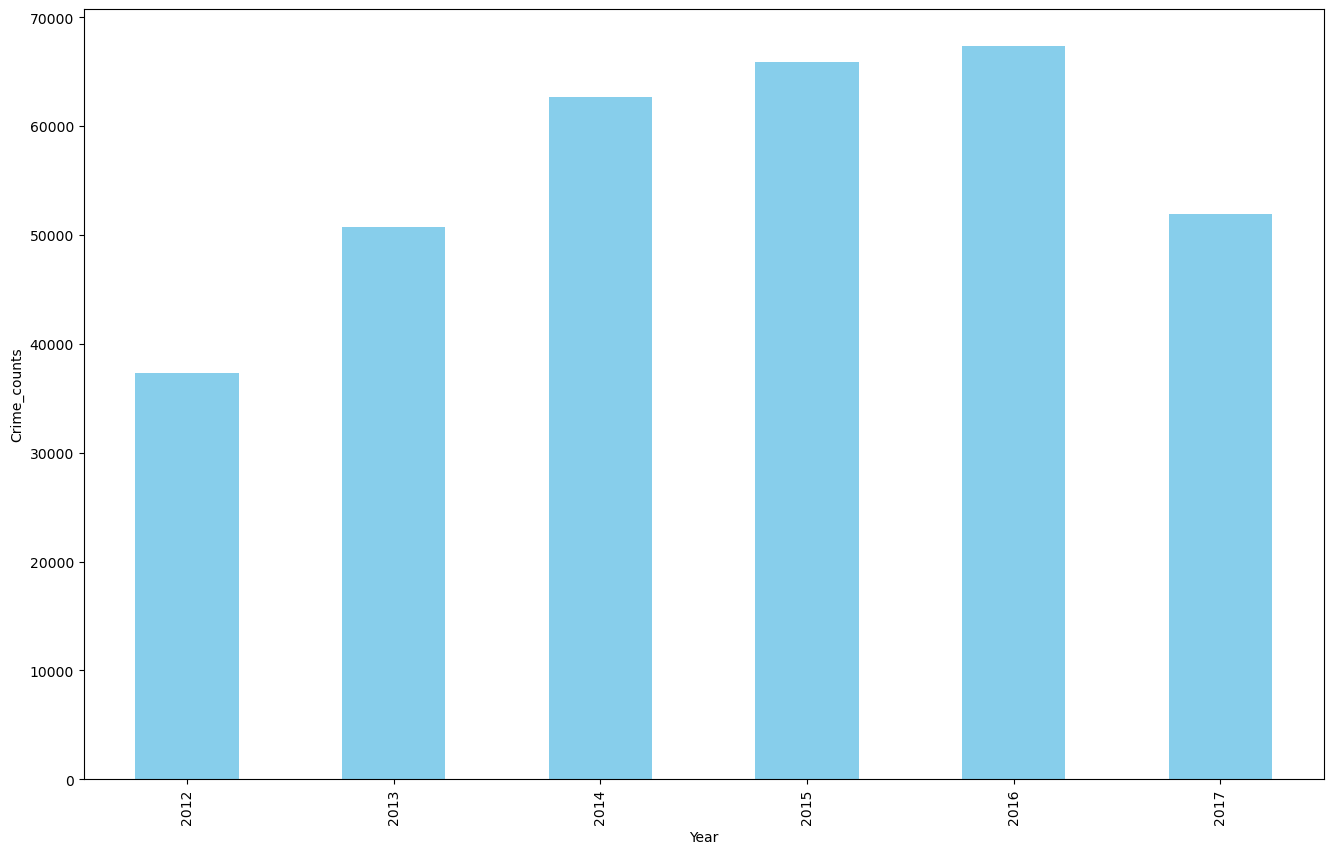

In [40]:
plt.figure(figsize = (16,10))
year_crime.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Year')
plt.ylabel('Crime_counts')
plt.show()

In [41]:
traffic = crime[crime['OFFENSE_CATEGORY_ID'] == 'traffic-accident']

In [42]:
traffic

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year,month
REPORTED_DATE,,,,,,,,,
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1,2012,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1,2012,1
2012-01-02 06:52:00,traffic-accident,traffic-accident,-104.959783,39.739988,cheesman-park,0,1,2012,1
2012-01-02 09:07:00,traffic-accident,traffic-accident,-104.977967,39.711030,washington-park-west,0,1,2012,1
2012-01-02 10:07:00,traffic-accident,traffic-accident,-104.987420,39.744885,cbd,0,1,2012,1
...,...,...,...,...,...,...,...,...,...
2017-09-28 21:59:00,traffic-accident-hit-and-run,traffic-accident,-104.958286,39.735410,congress-park,0,1,2017,9
2017-09-28 22:55:00,traffic-accident-dui-duid,traffic-accident,-104.959448,39.684726,university,0,1,2017,9
2017-09-28 23:02:00,traffic-accident,traffic-accident,-104.994970,39.768017,globeville,0,1,2017,9


<Axes: xlabel='year', ylabel='count'>

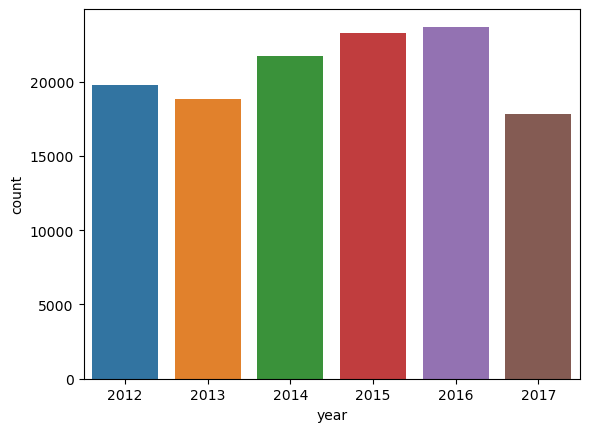

In [43]:
## 년도별

sns.countplot(x = 'year', data = traffic)